In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import json

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [5.0, 3.0]
plt.rcParams['figure.dpi'] = 150
%matplotlib notebook

In [2]:
true_data = pd.read_csv("csv_data/srilanka.txt",sep=' ', skipinitialspace=True, \
                        skiprows=1, header=None, names=['confirmed', 'recovered', 'deaths'])
true_data

,confirmed,recovered,deaths
0,3382,3233,13
1,3388,3245,13
2,3395,3254,13
3,3402,3258,13
4,3513,3259,13
...,...,...,...
448,582149,0,14832
449,582722,0,14852
450,583251,0,14871
451,583649,0,14884


In [3]:
smoothed_data = pd.read_csv("../C++/build/release/results/srilanka_popsmooth.txt", skipinitialspace=True, \
                            header=None, names=['confirmed_true', 'deaths_true', 'confirmed_smooth', 'deaths_smooth', 'vaccine_smooth', 'tests_smooth'])
diff_data = smoothed_data.diff();
diff_data.loc[0] = 0
smoothed_data

,confirmed_true,deaths_true,confirmed_smooth,deaths_smooth,vaccine_smooth,tests_smooth
0,3382,13,3382,13,0,291105
1,3388,13,3388,13,0,293262
2,3395,13,3416,13,0,294980
3,3402,13,3684,13,0,298181
4,3513,13,3842,13,0,301425
...,...,...,...,...,...,...
448,582149,14832,582071,14831,13820600,5829780
449,582722,14852,582628,14849,13823313,5836239
450,583251,14871,583176,14868,13826290,5842512
451,583649,14884,583669,14885,13828687,5847875


<IPython.core.display.Javascript object>


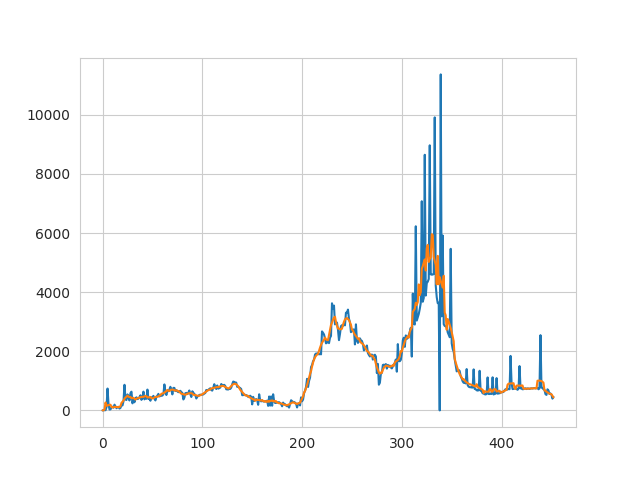

In [4]:
plt.figure()
plt.plot(diff_data['confirmed_true'])
plt.plot(diff_data['confirmed_smooth'])
plt.show()

<IPython.core.display.Javascript object>


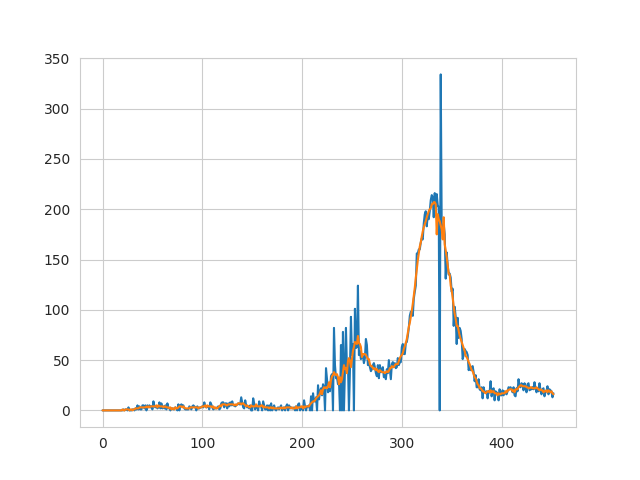

In [5]:
plt.figure()
plt.plot(diff_data['deaths_true'])
plt.plot(diff_data['deaths_smooth'])
plt.show()

<IPython.core.display.Javascript object>


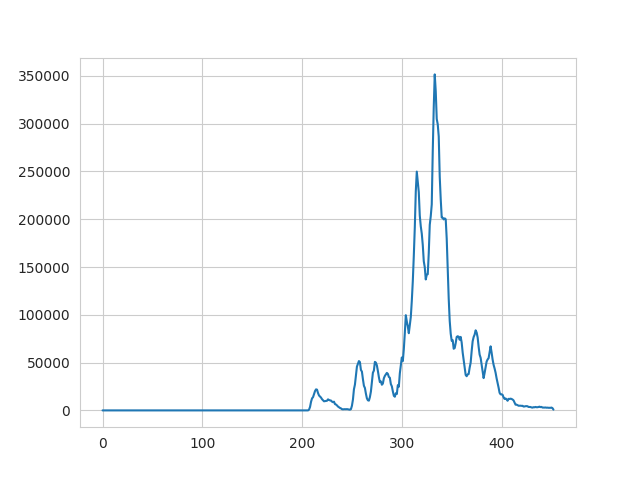

In [6]:
plt.figure()
plt.plot(diff_data['vaccine_smooth'])
plt.show()

<IPython.core.display.Javascript object>


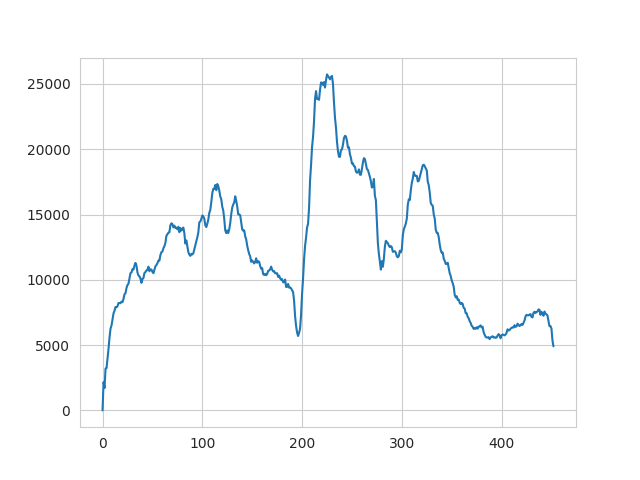

In [7]:
plt.figure()
plt.plot(diff_data['tests_smooth'])
plt.show()

In [24]:
pred_data = pd.read_csv("../C++/build/release/results/srilanka_prediction_seed1.txt", \
                        skipinitialspace=True)
# print("pred_data:\n", pred_data)
num_days = len(pred_data)
print("Num days:", num_days)

param_data = pd.read_csv("../C++/build/release/results/srilanka_params_seed1.txt", \
                        skipinitialspace=True,header=None)
# param_data = param_data.iloc[:, ::-1];
#print(param_data)

beta = param_data.loc[0:num_days-1]
IFR  = param_data.loc[num_days:2*num_days-1]

num_sol_to_plot = min(10, len(param_data.columns));

T_incub = param_data.loc[param_data.index[-7]]
T_recov = param_data.loc[param_data.index[-6]]
beta_test_scaling = param_data.loc[param_data.index[-5]]
beta_vac_scaling = param_data.loc[param_data.index[-4]]
vaccine_alpha = param_data.loc[param_data.index[-3]]
IFR_scaling = param_data.loc[param_data.index[-2]]
#print("Vaccine effectiveness:\n",vaccine_eff)

print("T_incub:\n", T_incub)
print("T_recov:\n", T_recov)
print("beta_test_scaling:\n", beta_test_scaling)
print("beta_vac_scaling:\n", beta_vac_scaling)
print("vaccine_alpha:\n", vaccine_alpha)
print("IFR_scaling:\n", IFR_scaling)

optimal_params = {
    "beta": beta[0].tolist(),
    "IFR"  : IFR[0].tolist(),
    "T_incub": T_incub[0],
    "T_recov": T_recov[0],
    "beta_test_scaling": beta_test_scaling[0],
    "beta_vac_scaling": beta_vac_scaling[0],
    "vaccine_alpha": vaccine_alpha[0],
    "IFR_scaling": IFR_scaling[0]
}

#Write optimal parameters as JS variable
opt_param_json_file = open("optimal_parameters.js", "w")
opt_param_json_file.write("let optimal_model_params = ")
json.dump(optimal_params, opt_param_json_file)
opt_param_json_file.close()

error = param_data.loc[param_data.index[-1]]
error_plot = error[0:num_sol_to_plot]
print("Error:\n",error)

scaled_error = (np.log(error_plot) - np.log(min(error_plot))) / (np.log(max(error_plot)) - np.log(min(error_plot))) * 0.9
print("Scaled error:\n", scaled_error)
grey_colors = np.tile(scaled_error,[3,1]).transpose();

# grey_colormap = matplotlib.colors.ListedColormap(grey_colors)
grey_colors[0] = [0.24, 0.63, 0.93] #Change color of best result to blue
print("Grey colors:\n", grey_colors)
# plt.figure()
# ax = sns.heatmap(np.random.rand(30,30))
# ax.pcolor(np.random.rand(30,30),cmap=grey_colormap)
# plt.show()

start_date = datetime.strptime("2020-10-1", "%Y-%m-%d")
dates = [];
for i in range(0,num_days):
    dates.append(start_date + timedelta(days=i))

locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)

Num days: 453
T_incub:
 0      2.975249
1      9.223481
2      9.374906
3      7.085682
4      4.452261
5      3.395717
6      6.863547
7      3.491567
8      5.561526
9      4.952110
10    10.000000
11     5.398682
12     9.443658
13     5.490420
14     8.583672
15     8.641198
16     7.495152
17     6.098977
18     4.486760
19     3.468869
Name: 906, dtype: float64
T_recov:
 0     13.685490
1     11.980450
2     11.974880
3     11.719880
4     11.772250
5     11.381160
6     11.414710
7     11.021650
8     11.372990
9      8.078706
10     6.178455
11     8.807479
12     5.538780
13     7.116211
14     5.538986
15     6.050837
16     6.260998
17     6.503307
18     5.658054
19     6.557847
Name: 907, dtype: float64
beta_test_scaling:
 0     1.000000
1     0.945850
2     0.825223
3     0.841355
4     0.586630
5     0.639977
6     1.000000
7     1.000000
8     0.651724
9     0.845433
10    0.459231
11    0.503948
12    0.001183
13    0.953861
14    0.262647
15    0.269529
16    0.323584

<IPython.core.display.Javascript object>


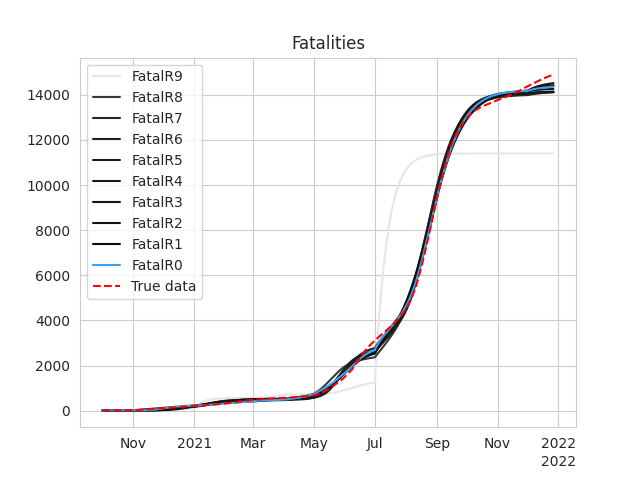

In [25]:
pred_fatal = pred_data.filter(regex=("FatalR.*"))

fig = plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates,pred_fatal["FatalR"+str(i)], color=grey_colors[i])
    
plt.plot(dates,smoothed_data["deaths_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
labels = pred_fatal.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Fatalities')
plt.show()


<IPython.core.display.Javascript object>


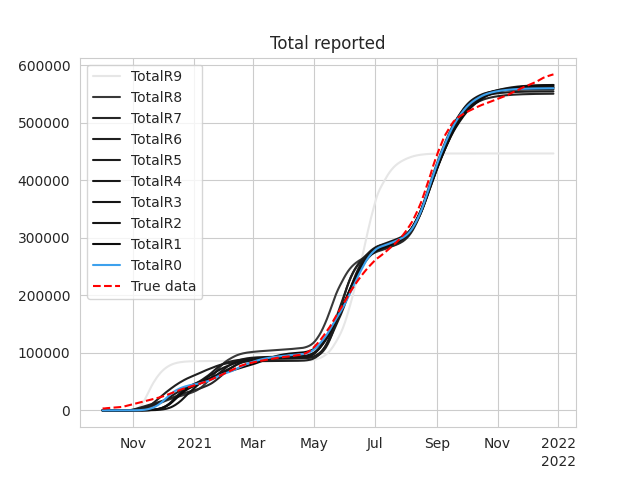

In [26]:
pred_reported = pred_data.filter(regex=("TotalR.*"))
# print(pred_reported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_reported["TotalR"+str(i)], color=grey_colors[i])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["confirmed_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_reported.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Total reported')
plt.show()

<IPython.core.display.Javascript object>


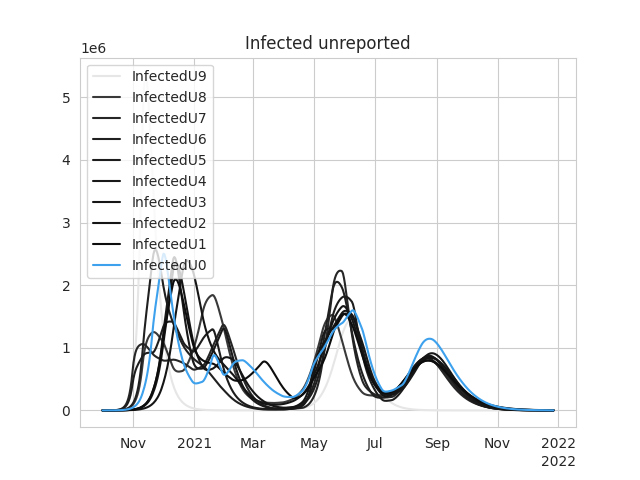

In [27]:
pred_reported = pred_data.filter(regex=("InfectedU.*"))
# print(pred_reported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_reported["InfectedU"+str(i)], color=grey_colors[i])

# plt.plot(dates, smoothed_data["confirmed_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_reported.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Infected unreported')
plt.show()

      TotalVac0   TotalVac1   TotalVac2   TotalVac3   TotalVac4   TotalVac5  \
0           0.0         0.0         0.0         0.0         0.0         0.0   
1           0.0         0.0         0.0         0.0         0.0         0.0   
2           0.0         0.0         0.0         0.0         0.0         0.0   
3           0.0         0.0         0.0         0.0         0.0         0.0   
4           0.0         0.0         0.0         0.0         0.0         0.0   
..          ...         ...         ...         ...         ...         ...   
448  13817863.0  13817863.0  13817863.0  13817863.0  13817863.0  13817863.0   
449  13820600.0  13820600.0  13820600.0  13820600.0  13820600.0  13820600.0   
450  13823313.0  13823313.0  13823313.0  13823313.0  13823313.0  13823313.0   
451  13826290.0  13826290.0  13826290.0  13826290.0  13826290.0  13826290.0   
452  13828687.0  13828687.0  13828687.0  13828687.0  13828687.0  13828687.0   

      TotalVac6   TotalVac7   TotalVac8     TotalVa

<IPython.core.display.Javascript object>


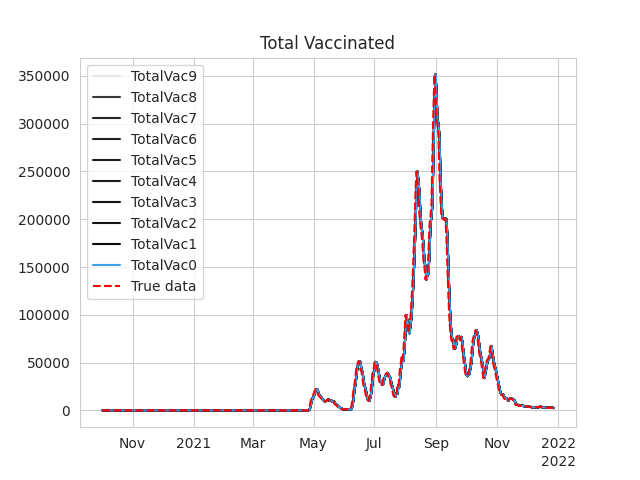

In [28]:
pred_vaccine = pred_data.filter(regex=("TotalVac.*"))
print(pred_vaccine)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_vaccine["TotalVac"+str(i)].diff(), color=grey_colors[i])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["vaccine_smooth"].diff(),'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_vaccine.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Total Vaccinated')
plt.show()

<IPython.core.display.Javascript object>


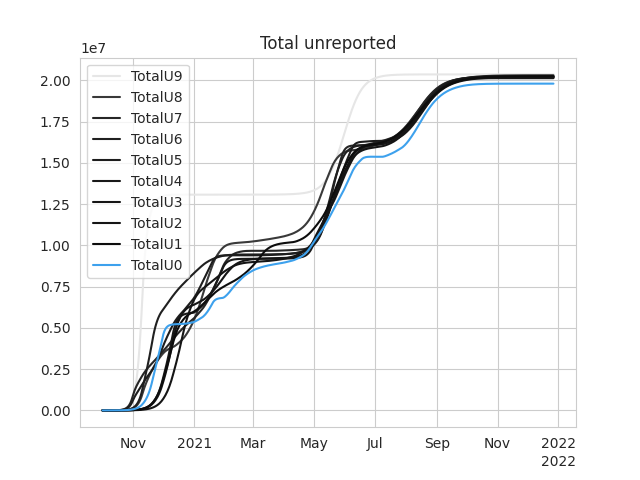

In [29]:
pred_unreported = pred_data.filter(regex=("TotalU.*"))
# print(pred_unreported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_unreported["TotalU"+str(i)], color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_unreported.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Total unreported')
plt.show()

        Reff0     Reff1     Reff2     Reff3     Reff4     Reff5     Reff6  \
0    5.711134  7.790084  6.455169  6.294653  5.029154  8.181239  9.507148   
1    5.711117  7.789549  6.453803  6.293462  5.026691  8.177846  9.507096   
2    5.711097  7.789619  6.454057  6.293680  5.027179  8.178495  9.507038   
3    5.711073  7.789237  6.453111  6.292852  5.025482  8.176138  9.506971   
4    5.711044  7.789186  6.453060  6.292803  5.025418  8.176009  9.506889   
..        ...       ...       ...       ...       ...       ...       ...   
448  0.070656  0.161947  0.134043  0.064779  0.062504  0.174550  0.201828   
449  0.070682  0.161998  0.134074  0.064798  0.062512  0.174573  0.201902   
450  0.070388  0.161429  0.133784  0.064659  0.062500  0.174484  0.201083   
451  0.071201  0.164424  0.135852  0.065630  0.063283  0.176727  0.204959   
452  0.073089  0.169485  0.138905  0.067078  0.064143  0.179359  0.211844   

        Reff7     Reff8     Reff9    Reff10    Reff11    Reff12    Reff13  

<IPython.core.display.Javascript object>


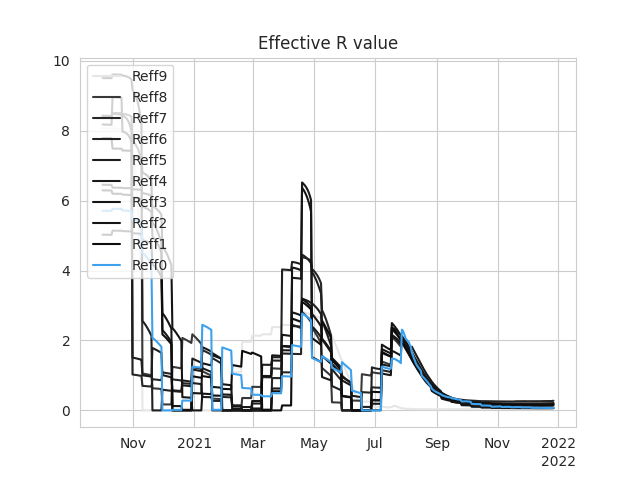

<IPython.core.display.Javascript object>


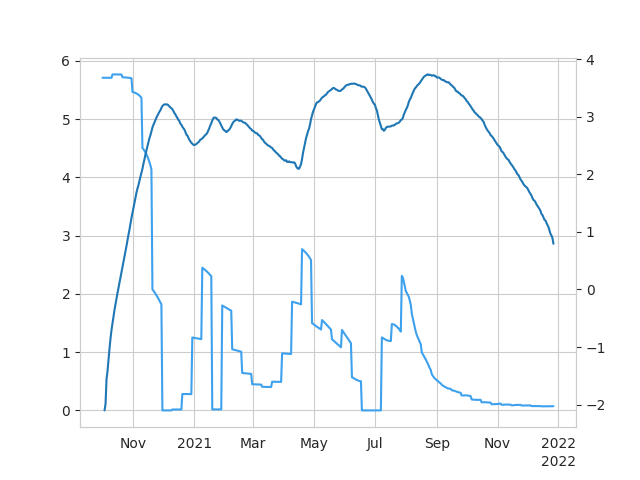

/home/savithru/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
pred_Reff = pred_data.filter(regex=("Reff.*"))
pred_reported = pred_data.filter(regex=("TotalR.*"))
print(pred_Reff)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_Reff["Reff"+str(i)], color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_Reff.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Effective R value')
plt.show()

plt.figure()
plt.plot(dates, pred_Reff["Reff0"], color=grey_colors[0])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax2 = ax.twinx()
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.plot(dates, np.log10(pred_reported["TotalR0"].diff()))
ax2.grid(None)
plt.show()

<IPython.core.display.Javascript object>


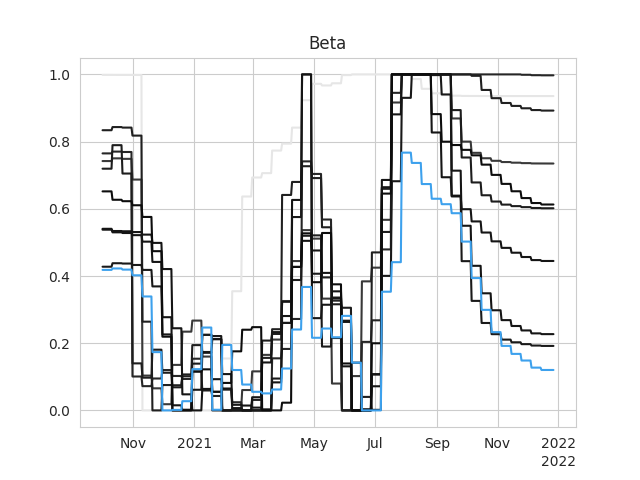

In [31]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, beta[i], color=grey_colors[i])
# sns.lineplot(data=beta,palette=grey_colormap, dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('Beta')
plt.show()

<IPython.core.display.Javascript object>


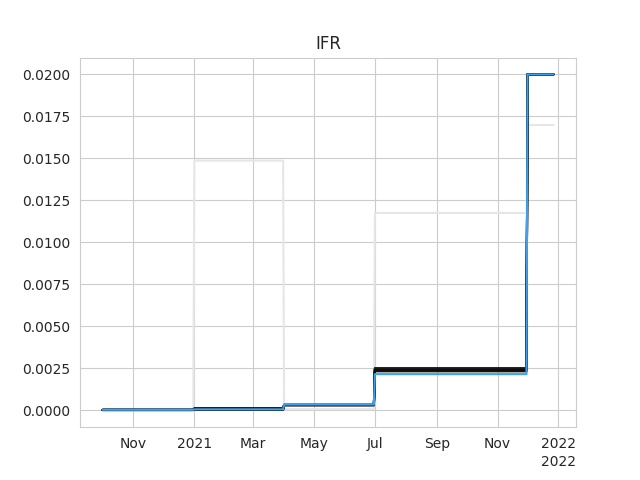

In [32]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, IFR[i], color=grey_colors[i])
# sns.lineplot(data=IFR,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('IFR')
plt.show()

In [ ]:

err_t = (pred_data['TotalR0'] - smoothed_data["confirmed_smooth"])
err_f = (pred_data['FatalR0'] - smoothed_data["deaths_smooth"])
cost_t = np.linalg.norm(err_t)**2 / np.linalg.norm(smoothed_data["confirmed_smooth"])**2;
cost_f = np.linalg.norm(err_f)**2 / np.linalg.norm(smoothed_data["deaths_smooth"])**2
print(cost_t, cost_f, cost_t+cost_f)
#print(smoothed_data["confirmed_smooth"])

In [ ]:
print(err_t)
print(format(np.linalg.norm(smoothed_data["confirmed_smooth"])**2, '1.8e'))
print(format(np.linalg.norm(smoothed_data["deaths_smooth"])**2, '1.8e'))